# Exploratory Data Analysis

## Importing Packages

In [2]:
# importing necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
import folium
import requests
import numpy as np
import ssl
_create_unverified_https_context = ssl._create_unverified_context
ssl._create_default_https_context = _create_unverified_https_context

## Reading in Data

In [3]:
# reading in the historic dataframe
historic_df = pd.read_csv('../data/NABR_historic.csv') 
historic_df.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
2,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,13.79,0.964835,23.15924,0.964835,37.05,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,2.69,0.964835,23.15924,23.159240,37.05,NaN,NaN,NaN,NaN,NaN
4,-110.0472,37.60413,1980,Hist,historical,sc1,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.45,0.113447,0.096831,0.041876,0.052298


In [4]:
# reading in the recent dataframe
recent_df = pd.read_csv('../data/nearterm_data_2020-2024.csv') 
recent_df.head()

,long,lat,year,TimePeriod,RCP,scenario,treecanopy,Ann_Herb,Bare,Herb,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,6.37,1.630333,24.50402,24.50402,36.89,NaN,NaN,NaN,NaN,NaN
1,-110.0472,37.60413,2021,NT,4.5,sc22,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-12.77,0.114652,0.078764,0.043514,0.051281
2,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,3.09,1.389056,24.11043,24.11043,37.95,NaN,NaN,NaN,NaN,NaN
3,-110.0472,37.60413,2021,NT,4.5,sc23,0,0,84,5,...,NaN,NaN,NaN,NaN,NaN,-18.96,0.130221,0.096412,0.041232,0.092241
4,-110.0472,37.60413,2021,NT,4.5,sc24,0,0,84,5,...,6.87,-0.334389,25.54266,10.31321,37.74,NaN,NaN,NaN,NaN,NaN


## Initial EDA

### Data Shape

In [5]:
historic_df.shape

(13821, 29)

In [6]:
recent_df.shape

(55802, 29)

### Summary Statistics for Numerical Columns

In [7]:
historic_df.describe()

,long,lat,year,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,DrySoilDays_Summer_whole,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
count,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,13821.000000,4476.000000,...,7930.000000,9453.000000,9453.000000,7930.000000,9453.000000,4476.000000,4476.000000,4476.000000,4476.000000,4476.000000
mean,-110.005518,37.608507,1998.889299,10.062586,0.228131,56.148976,9.553144,11.769626,15.482454,7.447274,...,7.335531,-0.141305,22.409513,10.722353,35.880022,-15.534115,0.119312,0.109115,0.068170,0.093811
std,0.022635,0.016206,11.283303,8.855615,1.069702,18.418774,3.887177,6.112302,8.594975,20.763970,...,3.619670,1.400045,1.024607,8.150340,1.346755,3.135112,0.037770,0.039504,0.018894,0.028577
min,-110.047200,37.570340,1980.000000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,...,1.760000,-3.434615,19.554890,-3.434615,32.150000,-26.250000,0.032807,0.034724,0.030281,0.031248
25%,-110.027300,37.598060,1989.000000,0.000000,0.000000,43.000000,8.000000,7.000000,10.000000,0.000000,...,4.870000,-1.228889,21.714130,2.312500,34.950000,-17.250000,0.091431,0.079048,0.052521,0.073958
50%,-110.005000,37.609150,1999.000000,9.000000,0.000000,54.000000,10.000000,10.000000,15.000000,0.000000,...,6.720000,-0.208333,22.327170,10.509780,35.850000,-14.950000,0.119300,0.101166,0.066038,0.092939
75%,-109.987800,37.622350,2009.000000,18.000000,0.000000,67.000000,11.000000,16.000000,20.000000,0.000000,...,9.690000,0.906593,23.132610,13.428020,37.050000,-13.850000,0.144474,0.138545,0.083102,0.111148
max,-109.965900,37.634760,2018.000000,29.000000,6.000000,94.000000,20.000000,26.000000,46.000000,89.000000,...,20.630000,3.393333,24.550000,24.550000,38.550000,-9.350000,0.232833,0.214546,0.119182,0.205399


Historical data ranges from 1980-2018. 

In [8]:
recent_df.describe()

,long,lat,year,RCP,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
count,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,55802.000000,...,32000.000000,37882.000000,37882.000000,32000.000000,37882.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000
mean,-110.006322,37.608169,2022.499211,6.501290,9.672682,0.226067,56.630497,9.506523,11.736192,15.348428,...,7.876302,1.061328,23.896685,11.987947,37.409251,-13.854524,0.130339,0.113198,0.069430,0.095702
std,0.022496,0.016194,1.117402,2.000018,8.785014,1.063672,18.480834,3.891147,6.101769,8.562249,...,4.170495,1.649202,1.160074,8.181101,1.886281,4.273170,0.039756,0.041728,0.019916,0.031099
min,-110.047200,37.570340,2021.000000,4.500000,0.000000,0.000000,11.000000,1.000000,1.000000,0.000000,...,0.430000,-5.392722,19.264730,-5.392722,31.370000,-30.270000,0.036778,0.032329,0.029968,0.031148
25%,-110.027300,37.598060,2022.000000,4.500000,0.000000,0.000000,45.000000,8.000000,8.000000,10.000000,...,4.790000,0.110056,23.150540,4.064556,36.280000,-16.470000,0.102253,0.079512,0.052745,0.073698
50%,-110.005700,37.608620,2022.000000,8.500000,9.000000,0.000000,56.000000,10.000000,10.000000,14.000000,...,7.300000,1.143556,23.927660,11.702030,37.400000,-12.900000,0.129224,0.105576,0.068260,0.092410
75%,-109.990900,37.621560,2023.000000,8.500000,18.000000,0.000000,67.000000,11.000000,16.000000,20.000000,...,10.360000,2.135722,24.576680,14.686260,38.290000,-10.950000,0.155793,0.144423,0.084791,0.112807
max,-109.965900,37.634760,2024.000000,8.500000,29.000000,6.000000,94.000000,20.000000,26.000000,46.000000,...,33.730000,5.474725,27.745330,27.745330,47.170000,-6.510000,0.241642,0.219919,0.145245,0.230940


Recent data ranges from 2021-2024.

### Column Datatypes

In [9]:
historic_df.dtypes

long                                      float64
lat                                       float64
year                                        int64
TimePeriod                                 object
RCP                                        object
scenario                                   object
treecanopy                                  int64
Ann_Herb                                    int64
Bare                                        int64
Herb                                        int64
Litter                                      int64
Shrub                                       int64
DrySoilDays_Summer_whole                  float64
Evap_Summer                               float64
ExtremeShortTermDryStress_Summer_whole    float64
FrostDays_Winter                          float64
NonDrySWA_Summer_whole                    float64
PPT_Winter                                float64
PPT_Summer                                float64
PPT_Annual                                float64


In [10]:
recent_df.dtypes

long                                      float64
lat                                       float64
year                                        int64
TimePeriod                                 object
RCP                                       float64
scenario                                   object
treecanopy                                  int64
Ann_Herb                                    int64
Bare                                        int64
Herb                                        int64
Litter                                      int64
Shrub                                       int64
DrySoilDays_Summer_whole                  float64
Evap_Summer                               float64
ExtremeShortTermDryStress_Summer_whole    float64
FrostDays_Winter                          float64
NonDrySWA_Summer_whole                    float64
PPT_Winter                                float64
PPT_Summer                                float64
PPT_Annual                                float64


### Identify NANs

In [11]:
historic_df.isna().sum()

long                                         0
lat                                          0
year                                         0
TimePeriod                                   0
RCP                                          0
scenario                                     0
treecanopy                                   0
Ann_Herb                                     0
Bare                                         0
Herb                                         0
Litter                                       0
Shrub                                        0
DrySoilDays_Summer_whole                  9345
Evap_Summer                               9345
ExtremeShortTermDryStress_Summer_whole    9345
FrostDays_Winter                          9345
NonDrySWA_Summer_whole                    9368
PPT_Winter                                4368
PPT_Summer                                4368
PPT_Annual                                5891
T_Winter                                  4368
T_Summer     

In [12]:
recent_df.isna().sum()

long                                          0
lat                                           0
year                                          0
TimePeriod                                    0
RCP                                           0
scenario                                      0
treecanopy                                    0
Ann_Herb                                      0
Bare                                          0
Herb                                          0
Litter                                        0
Shrub                                         0
DrySoilDays_Summer_whole                  37529
Evap_Summer                               37529
ExtremeShortTermDryStress_Summer_whole    37535
FrostDays_Winter                          37529
NonDrySWA_Summer_whole                    37630
PPT_Winter                                17920
PPT_Summer                                17920
PPT_Annual                                23802
T_Winter                                

### Viewing Correlations

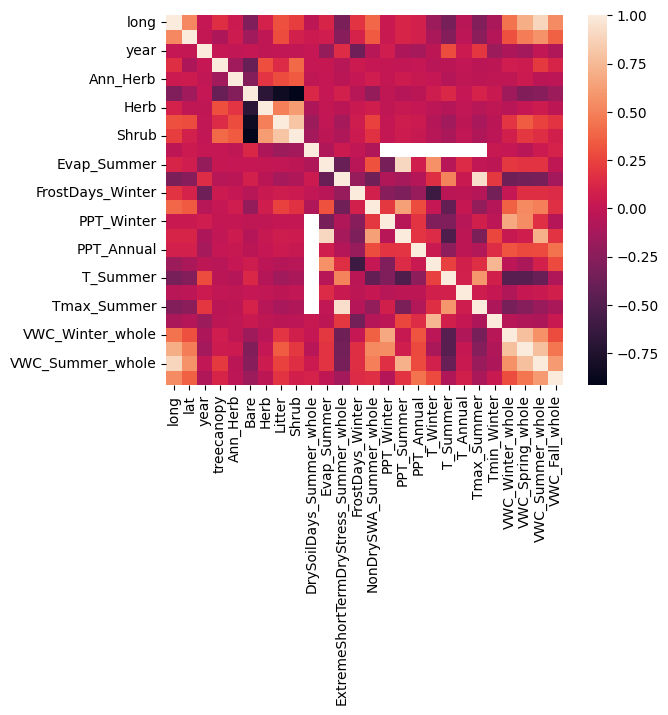

In [13]:
sns.heatmap(historic_df.select_dtypes(include='number').corr())
plt.show()

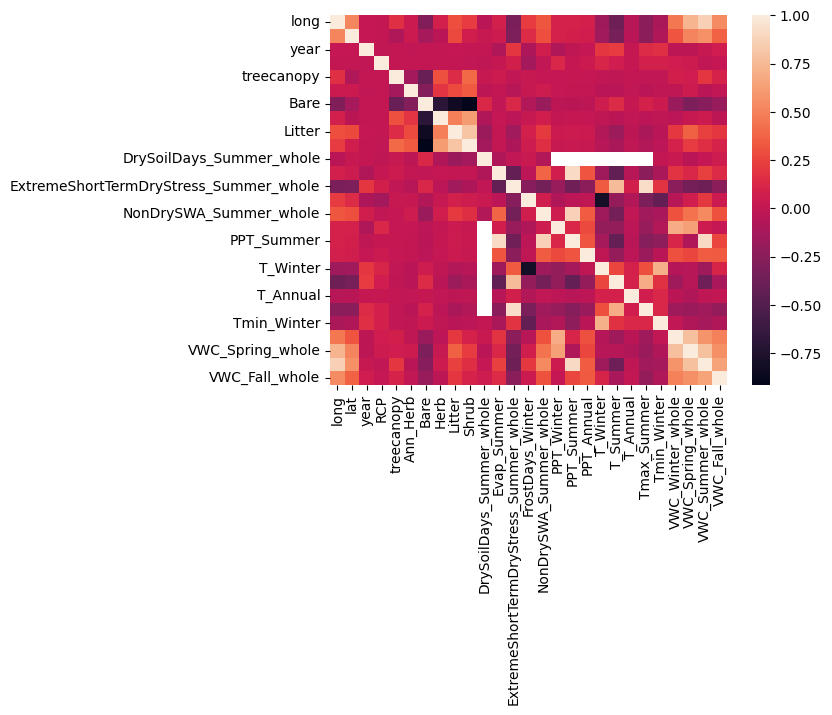

In [14]:
sns.heatmap(recent_df.select_dtypes(include='number').corr())
plt.show()

### Year

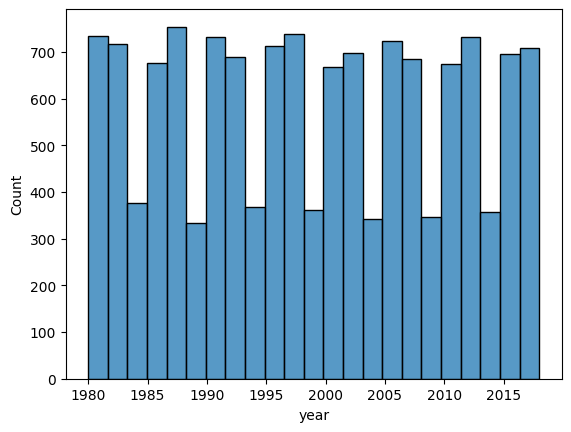

In [15]:
sns.histplot(data=historic_df, x="year")
plt.show()

### Latitude and Longitude

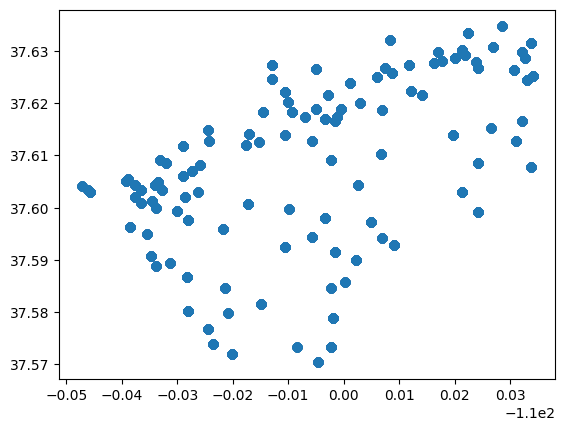

In [16]:
plt.scatter(x=historic_df['long'], y=historic_df['lat'])
plt.show()

In [17]:
df_1980 = historic_df[historic_df['year'] == 1980]

cmap = plt.colormaps['Greens']

norm = matplotlib.colors.Normalize(vmin=historic_df['Litter'].min(), vmax=historic_df['Litter'].max())

df_1980['color'] = df_1980['Litter'].apply(lambda x: cmap(norm(x)))

def rgba_to_hex(rgba):
    return '#' + ''.join([f'{int(255 * c):02x}' for c in rgba[:3]])

df_1980['color'] = df_1980['color'].apply(rgba_to_hex)

state_geo = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()
state_data = pd.read_csv(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_unemployment_oct_2012.csv"
)

m = folium.Map(location=[37.608507, -110.005518], zoom_start=12.5)


for i in range(df_1980.shape[0]):
    if not np.isnan(df_1980.iloc[i].Litter):
      folium.CircleMarker(location=[df_1980.iloc[i].lat,df_1980.iloc[i].long], radius= 8,
                        color=df_1980.iloc[i].color, fill_color = df_1980.iloc[i].color,
                        fill = True, fill_opacity=0.7, tooltip=df_1980.iloc[i].Litter).add_to(m)
m

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_43912/3003857659.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980['color'] = df_1980['Litter'].apply(lambda x: cmap(norm(x)))
/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_43912/3003857659.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980['color'] = df_1980['color'].apply(rgba_to_hex)


### Frost Days Over Time

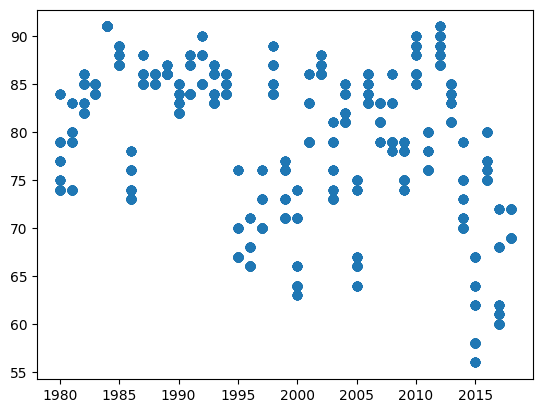

In [18]:
plt.scatter(x=historic_df['year'], y=historic_df['FrostDays_Winter'])
plt.show()

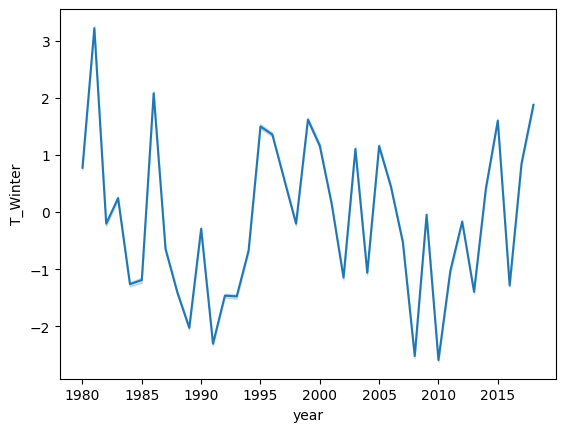

In [19]:
sns.lineplot(x=historic_df['year'], y=historic_df['T_Winter'])
plt.show()

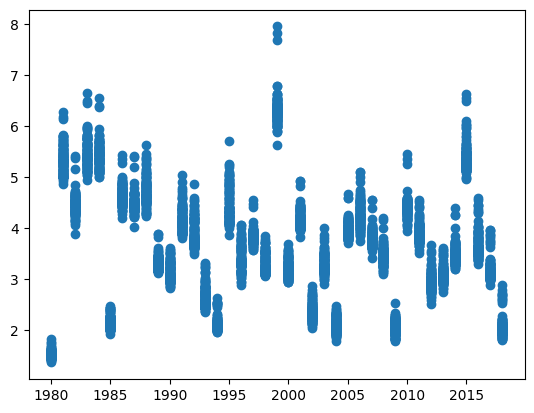

In [20]:
plt.scatter(x=historic_df['year'], y=historic_df['Evap_Summer'])
plt.show()

### Grouping by Year

In [21]:
grouped_historic_df = historic_df.groupby(by='year').mean().reset_index()
grouped_historic_df.head()

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_43912/3020530883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_historic_df = historic_df.groupby(by='year').mean().reset_index()


,year,long,lat,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,DrySoilDays_Summer_whole,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,1980,-110.005351,37.607539,10.704188,0.175393,55.238220,9.850785,12.039267,15.832461,9.017699,...,8.281304,0.777389,22.819936,10.792100,36.704444,-12.539381,0.138659,0.139731,0.067372,0.078143
1,1981,-110.007136,37.608959,8.835227,0.482955,55.946023,9.443182,12.028409,15.801136,5.950413,...,8.430754,3.221588,22.843714,11.240037,37.174583,-9.680579,0.082860,0.091203,0.066236,0.114685
2,1982,-110.003922,37.609079,11.077612,0.155224,55.531343,9.728358,11.928358,15.910448,6.690265,...,7.831492,-0.203652,21.612221,10.879676,36.264798,-16.973894,0.130767,0.109395,0.070423,0.098744
3,1983,-110.006443,37.608673,10.070866,0.175853,55.160105,9.629921,11.774278,15.367454,4.238938,...,10.440302,0.243176,20.781342,9.620905,34.058922,-15.273894,0.143099,0.144084,0.070878,0.094463
4,1984,-110.005571,37.607210,10.382979,0.138298,56.356383,9.654255,11.789894,15.577128,5.451327,...,7.051814,-1.262377,21.450322,8.895733,34.810985,-18.656195,0.131594,0.111327,0.068098,0.093364


In [22]:
grouped_recent_df = recent_df.groupby(by='year').mean().reset_index()
grouped_recent_df.head()

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_43912/313397739.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_recent_df = recent_df.groupby(by='year').mean().reset_index()


,year,long,lat,RCP,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,...,PPT_Annual,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole
0,2021,-110.006754,37.607937,6.519654,9.754107,0.231762,56.863281,9.497597,11.611290,15.242235,...,8.043604,0.535845,23.459005,11.669819,36.853607,-15.342008,0.136478,0.117917,0.068904,0.095052
1,2022,-110.006034,37.608341,6.467818,9.625402,0.224630,56.435028,9.522277,11.832654,15.460702,...,7.189039,1.099121,24.007790,12.108498,37.731397,-13.389423,0.125575,0.109543,0.068425,0.090263
2,2023,-110.006250,37.608067,6.535535,9.575154,0.229331,56.499642,9.529589,11.766585,15.356498,...,8.536049,1.137974,23.861794,11.967798,37.239484,-13.486490,0.125822,0.110620,0.070790,0.100326
3,2024,-110.006253,37.608330,6.482184,9.736422,0.218534,56.724928,9.476509,11.733908,15.333908,...,7.736914,1.472978,24.258524,12.206578,37.812284,-13.198068,0.133504,0.114727,0.069604,0.097175


In [23]:
total_grouped_df = pd.concat([grouped_historic_df, grouped_recent_df])

In [24]:
total_grouped_df

,year,long,lat,treecanopy,Ann_Herb,Bare,Herb,Litter,Shrub,DrySoilDays_Summer_whole,...,T_Winter,T_Summer,T_Annual,Tmax_Summer,Tmin_Winter,VWC_Winter_whole,VWC_Spring_whole,VWC_Summer_whole,VWC_Fall_whole,RCP
0,1980,-110.005351,37.607539,10.704188,0.175393,55.238220,9.850785,12.039267,15.832461,9.017699,...,0.777389,22.819936,10.792100,36.704444,-12.539381,0.138659,0.139731,0.067372,0.078143,NaN
1,1981,-110.007136,37.608959,8.835227,0.482955,55.946023,9.443182,12.028409,15.801136,5.950413,...,3.221588,22.843714,11.240037,37.174583,-9.680579,0.082860,0.091203,0.066236,0.114685,NaN
2,1982,-110.003922,37.609079,11.077612,0.155224,55.531343,9.728358,11.928358,15.910448,6.690265,...,-0.203652,21.612221,10.879676,36.264798,-16.973894,0.130767,0.109395,0.070423,0.098744,NaN
3,1983,-110.006443,37.608673,10.070866,0.175853,55.160105,9.629921,11.774278,15.367454,4.238938,...,0.243176,20.781342,9.620905,34.058922,-15.273894,0.143099,0.144084,0.070878,0.094463,NaN
4,1984,-110.005571,37.607210,10.382979,0.138298,56.356383,9.654255,11.789894,15.577128,5.451327,...,-1.262377,21.450322,8.895733,34.810985,-18.656195,0.131594,0.111327,0.068098,0.093364,NaN
5,1985,-110.005950,37.608551,9.058480,0.327485,56.149123,9.467836,11.812865,15.409357,6.715517,...,-1.190768,22.960838,9.736100,37.118696,-18.750862,0.131757,0.136820,0.068432,0.131878,NaN
6,1986,-110.004749,37.609148,10.095808,0.209581,56.251497,9.676647,11.784431,15.571856,6.327434,...,2.080776,21.938382,11.650818,34.554054,-12.105752,0.152562,0.116884,0.069044,0.127797,NaN
7,1987,-110.004819,37.610127,9.597855,0.219839,54.656836,9.788204,12.056300,15.605898,5.123894,...,-0.646356,21.471746,10.081023,33.710153,-14.347345,0.158368,0.129635,0.073397,0.104406,NaN
8,1988,-110.004435,37.608229,10.503937,0.136483,56.666667,9.556430,11.595801,15.217848,6.654867,...,-1.409471,22.738840,9.449284,35.196097,-16.122566,0.142341,0.123152,0.067566,0.076221,NaN
9,1989,-110.008762,37.607779,9.150150,0.435435,55.882883,9.381381,12.042042,16.081081,6.925620,...,-2.027321,22.129639,10.532511,37.792534,-19.955785,0.076107,0.086949,0.067286,0.065086,NaN


### Annual Average Temperature by Year

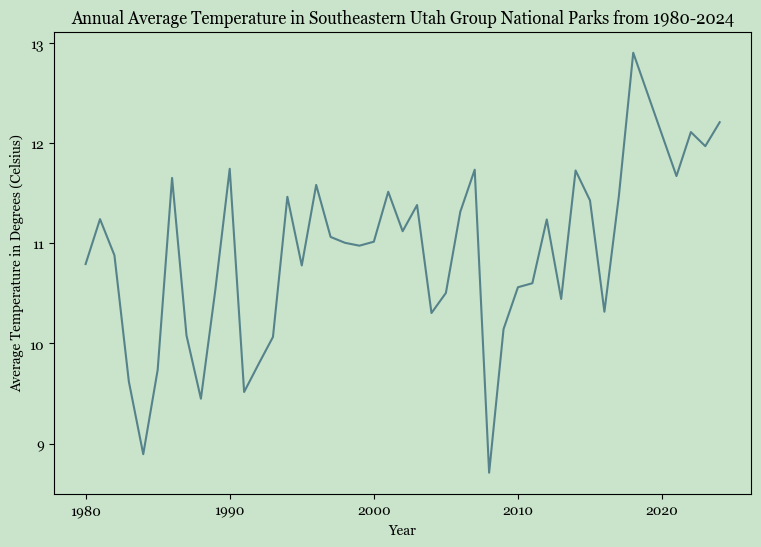

In [54]:
plt.figure(figsize=(9, 6))
sns.lineplot(x=total_grouped_df['year'], y=total_grouped_df['T_Annual'], color = '#55828B')
plt.rcParams["font.family"] = "Georgia"
plt.rcParams['axes.facecolor'] = "#C9E4CA"
plt.rcParams['figure.facecolor'] = "#C9E4CA"
plt.xlabel('Year')
plt.ylabel('Average Temperature in Degrees (Celsius)')
plt.title('Annual Average Temperature in Southeastern Utah Group National Parks from 1980-2024')
plt.savefig('../website/images/average_temp.png')
plt.show()

### Average Frost Days by Year

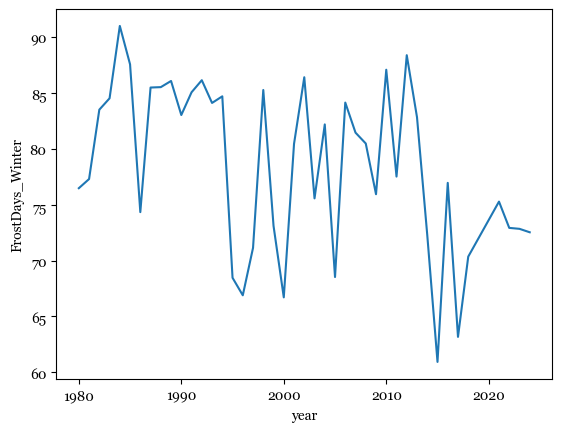

In [26]:
sns.lineplot(x=total_grouped_df['year'], y=total_grouped_df['FrostDays_Winter'])
plt.show()

### Bare Land Over the Years

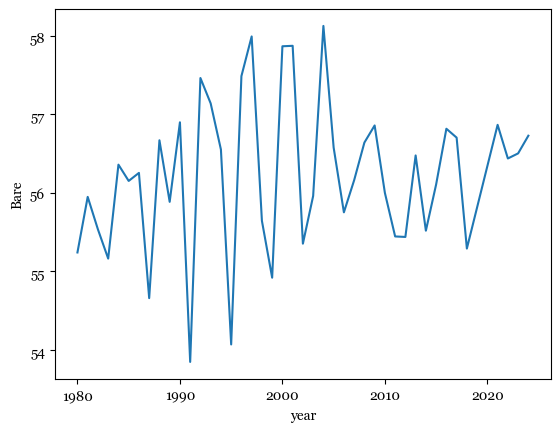

In [27]:
sns.lineplot(x=total_grouped_df['year'], y=total_grouped_df['Bare'])
plt.show()

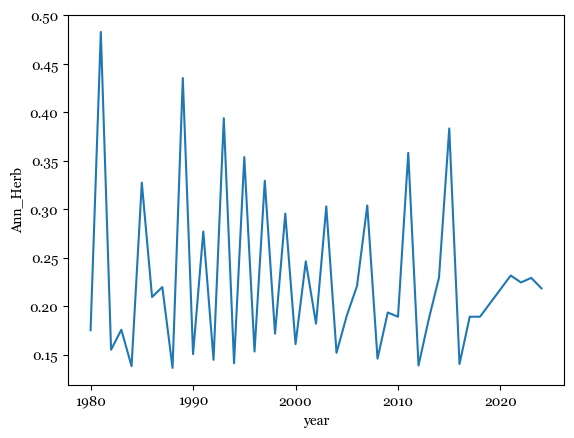

In [28]:
sns.lineplot(x=total_grouped_df['year'], y=total_grouped_df['Ann_Herb'])
plt.show()

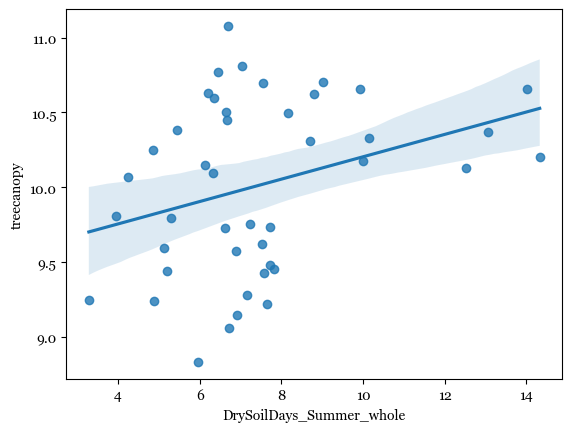

In [29]:
sns.regplot(x=total_grouped_df['DrySoilDays_Summer_whole'], y=total_grouped_df['treecanopy'])
plt.show()

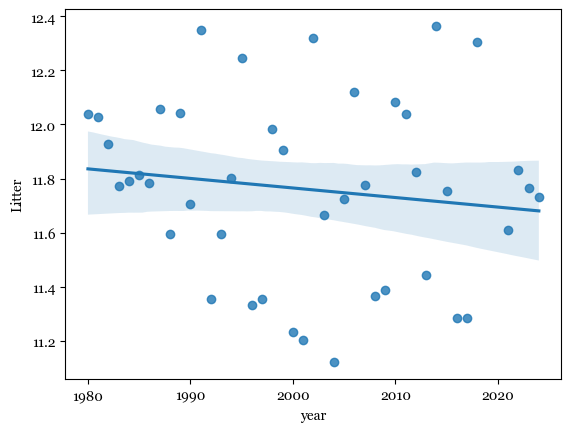

In [30]:
sns.regplot(x=total_grouped_df['year'], y=total_grouped_df['Litter'])
plt.show()

### Litter

There is a strong relationship between decrease in plant litter over time.

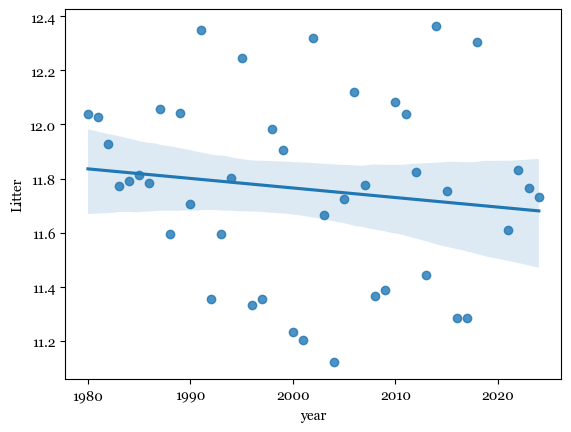

In [31]:
sns.regplot(x=total_grouped_df['year'], y=total_grouped_df['Litter'])
plt.show()

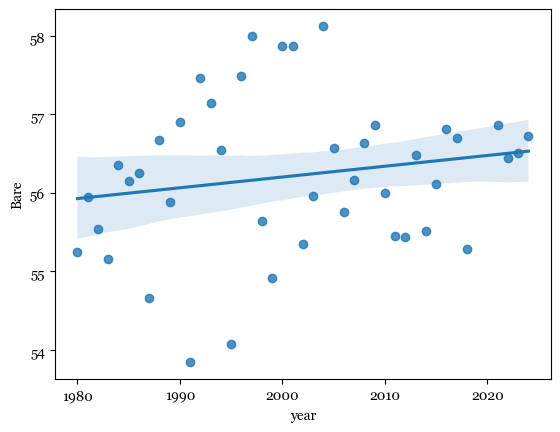

In [32]:
sns.regplot(x=total_grouped_df['year'], y=total_grouped_df['Bare'])
plt.show()

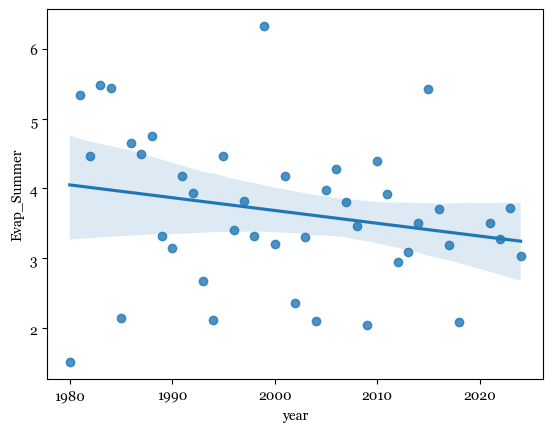

In [33]:
sns.regplot(x=total_grouped_df['year'], y=total_grouped_df['Evap_Summer'])
plt.show()

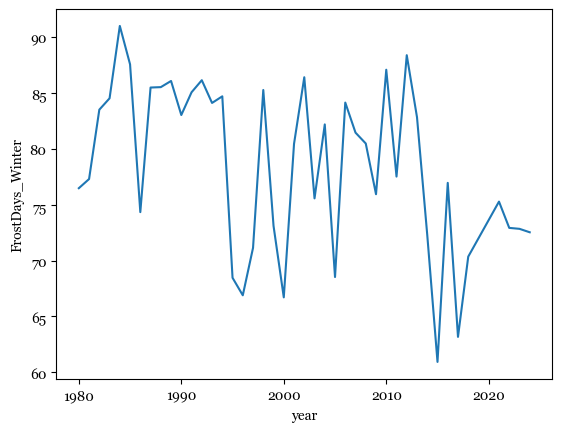

In [34]:
sns.lineplot(x=total_grouped_df['year'], y=total_grouped_df['FrostDays_Winter'])
plt.show()

We can see that less plant litter is associated with more bare ground. As the plant litter is decreasing over the years, the bare land is also increasing.

In [35]:
total_grouped_df.select_dtypes(include='number').corr()['year']

year                                      1.000000
long                                      0.020453
lat                                      -0.051504
treecanopy                                0.045849
Ann_Herb                                 -0.099224
Bare                                      0.180109
Herb                                     -0.169715
Litter                                   -0.135062
Shrub                                    -0.193451
DrySoilDays_Summer_whole                  0.066159
Evap_Summer                              -0.221571
ExtremeShortTermDryStress_Summer_whole    0.333175
FrostDays_Winter                         -0.436930
NonDrySWA_Summer_whole                    0.032263
PPT_Winter                                0.099097
PPT_Summer                               -0.082996
PPT_Annual                               -0.180385
T_Winter                                  0.124326
T_Summer                                  0.473631
T_Annual                       

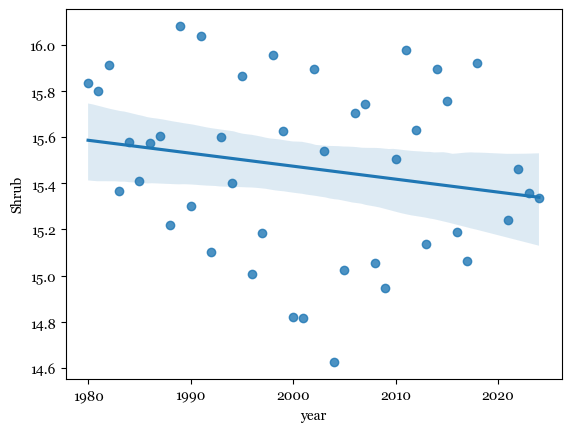

In [36]:
sns.regplot(x=total_grouped_df['year'], y=total_grouped_df['Shrub'])
plt.show()

In [37]:
from folium.plugins import HeatMap

In [38]:
df_1980[['long', 'lat', 'Shrub']]

,long,lat,Shrub
0,-110.0472,37.60413,7
1,-110.0472,37.60413,7
2,-110.0472,37.60413,7
3,-110.0472,37.60413,7
4,-110.0472,37.60413,7
...,...,...,...
13666,-109.9659,37.62525,22
13667,-109.9659,37.62525,22
13668,-109.9659,37.62525,22
13669,-109.9659,37.62525,22


In [39]:
cmap = plt.colormaps['Greens']

norm = matplotlib.colors.Normalize(vmin=historic_df['Litter'].min(), vmax=historic_df['Litter'].max())

df_1980['norm'] = norm

/var/folders/_8/crn2q8y154j26jm9jc_zpzgw0000gn/T/ipykernel_43912/2470358848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1980['norm'] = norm


In [40]:
heat_data = [[row['lat'], row['long'], row['Shrub']] for index, row in df_1980.iterrows()]

HeatMap(heat_data).add_to(m)
m